In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
#Load Dataset
train_path = r"/Users/astromeria/PycharmProjects/SPWLA_2021_Geolatinas/dataset/train_dataset_clean.csv"
train_data = pd.read_csv(train_path)
print(train_data)

discarded =  ["WELLNUM", "DEPTH"]
targets = ['PHIF', 'VSH', 'SW']
features = ["DTC",  "DTS",       "DEN",        "GR",       "NEU", "PEF",      "RDEP",      "RMED"]
train_data = train_data.drop(columns=discarded)
print(len(train_data))
train_data = train_data.dropna()
train_data = train_data.sample(n=1500,replace=False)
print(len(train_data))

#separate in x (inputs) and y(targets or outputs)
x_train = train_data.loc[:, ~train_data.columns.isin(targets)]
y_train = train_data.loc[:, targets]

print(x_train)
print(y_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)


       WELLNUM         DEPTH       DTC  DTS       DEN        GR       NEU  \
0            0  14121.660105  1.050557  NaN  1.037379  1.972747  1.440322   
1            0  14122.160105  1.567834  NaN  0.396783  3.263401  1.695148   
2            0  14122.660105  2.220044  NaN -0.481001  4.577702  3.979759   
3            0  14123.160105  2.987972  NaN -1.091091  5.759423  5.960678   
4            0  14123.660105  3.335636  NaN -1.140895  8.714084  5.611446   
...        ...           ...       ...  ...       ...       ...       ...   
42304        8  12142.500000 -0.985542  NaN  1.257261 -0.280881 -1.082402   
42305        8  12143.000000 -0.853113  NaN  1.265428 -0.448097 -1.231667   
42306        8  12143.500000 -0.753608  NaN  1.303696 -0.571419 -1.255538   
42307        8  12144.000000 -0.824041  NaN  1.322098 -0.682680 -1.382517   
42308        8  12144.500000 -0.795052  NaN  1.285250 -0.708376 -1.343860   

            PEF      RDEP      RMED      PHIF   SW       VSH  
0           

In [3]:
#model
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(y_train.keys()))
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse',])
  return model

#create a model instance
model = build_model()

history = model.fit(
  x_train, y_train,
  epochs=50, validation_split = 0.1, verbose=2 #just 10% for validation to use most of the data on training
  )
explainer = shap.KernelExplainer(model.predict,x_train)
#explainer = shap.TreeExplainer(model)


Epoch 1/50


2022-01-19 01:47:02.855111: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-19 01:47:02.897280: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


29/29 - 1s - loss: 0.0470 - mae: 0.1371 - mse: 0.0470 - val_loss: 0.0152 - val_mae: 0.0854 - val_mse: 0.0152
Epoch 2/50
29/29 - 0s - loss: 0.0079 - mae: 0.0614 - mse: 0.0079 - val_loss: 0.0094 - val_mae: 0.0680 - val_mse: 0.0094
Epoch 3/50
29/29 - 0s - loss: 0.0057 - mae: 0.0523 - mse: 0.0057 - val_loss: 0.0067 - val_mae: 0.0553 - val_mse: 0.0067
Epoch 4/50
29/29 - 0s - loss: 0.0048 - mae: 0.0477 - mse: 0.0048 - val_loss: 0.0061 - val_mae: 0.0530 - val_mse: 0.0061
Epoch 5/50
29/29 - 0s - loss: 0.0037 - mae: 0.0422 - mse: 0.0037 - val_loss: 0.0069 - val_mae: 0.0527 - val_mse: 0.0069
Epoch 6/50
29/29 - 0s - loss: 0.0038 - mae: 0.0424 - mse: 0.0038 - val_loss: 0.0055 - val_mae: 0.0440 - val_mse: 0.0055
Epoch 7/50
29/29 - 0s - loss: 0.0032 - mae: 0.0391 - mse: 0.0032 - val_loss: 0.0052 - val_mae: 0.0443 - val_mse: 0.0052
Epoch 8/50
29/29 - 0s - loss: 0.0031 - mae: 0.0386 - mse: 0.0031 - val_loss: 0.0055 - val_mae: 0.0470 - val_mse: 0.0055
Epoch 9/50
29/29 - 0s - loss: 0.0028 - mae: 0.0374 

Using 1005 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [4]:
shap_values = explainer.shap_values(x_test,nsamples=200)

  0%|          | 0/495 [00:00<?, ?it/s]

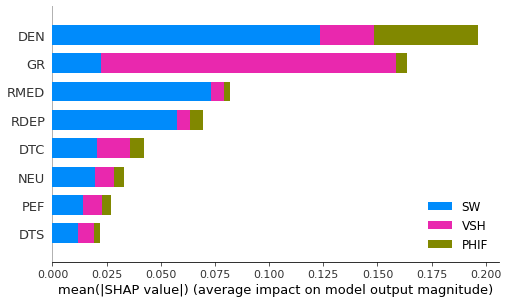

In [5]:
shap.summary_plot(shap_values,x_test,feature_names=features, class_names = targets)